# Singleagent Aircap Experiments Bag Recording Scripts, Plots and CSVs

Below we combine the data from from rosbags, analyse them save as csv. 

#### Import Libraries

In [112]:
import rosbag
from geometry_msgs.msg import PoseWithCovarianceStamped, PointStamped
import os
import matplotlib.pyplot as plt
import numpy as np
import random
BOLD = '\033[1m'
NORMAL = '\033[0m'

Print All Bag Names

In [113]:
# sa or ma
path = 'sa/'
bags = os.listdir(path)
print(BOLD+'List of bags:'+NORMAL+'{}'.format(bags))
sample_bag = rosbag.Bag(path+bags[random.randint(0,20)])

print(BOLD+'\n List of Topics Recorded:'+NORMAL+'{}'.format(sample_bag.get_type_and_topic_info()[1].keys()))

List of bags:['sa_aircap14_2020-05-15-01-44-15.bag', 'sa_aircap9_2020-05-15-01-28-16.bag', 'sa_aircap19_2020-05-15-02-00-10.bag', 'sa_aircap7_2020-05-15-01-21-51.bag', 'sa_aircap1_2020-05-15-01-02-45.bag', 'sa_aircap15_2020-05-15-01-47-26.bag', 'sa_aircap3_2020-05-15-01-09-07.bag', 'sa_aircap13_2020-05-15-01-41-04.bag', 'sa_aircap4_2020-05-15-01-12-18.bag', 'sa_aircap0_2020-05-15-00-59-34.bag', 'sa_aircap2_2020-05-15-01-05-57.bag', 'sa_aircap12_2020-05-15-01-37-53.bag', 'sa_aircap10_2020-05-15-01-31-27.bag', 'sa_aircap17_2020-05-15-01-53-48.bag', 'sa_aircap6_2020-05-15-01-18-40.bag', 'sa_aircap5_2020-05-15-01-15-29.bag', 'sa_aircap8_2020-05-15-01-25-06.bag', 'sa_aircap16_2020-05-15-01-50-37.bag', 'sa_aircap11_2020-05-15-01-34-42.bag', 'sa_aircap18_2020-05-15-01-56-59.bag']

 List of Topics Recorded:['/machine_1/triangulated_root_cov_0', '/machine_1/triangulated_root_cov_1', '/machine_1/triangulated_root_cov_2', '/machine_1/triangulated_root_cov_3', '/machine_1/triangulated_root_cov_4',

#### Choose Topics to Read

In [114]:
centering_topics = ['/centering']
joints_topics = []
for machine in range(1,2):
    for joint in range(14):
        joints_topics.append('/machine_'+str(machine)+'/triangulated_weighted_root_cov_'+str(joint))
print(BOLD+'joint error topics'+NORMAL+' {}'.format(joints_topics))

joint error topics ['/machine_1/triangulated_weighted_root_cov_0', '/machine_1/triangulated_weighted_root_cov_1', '/machine_1/triangulated_weighted_root_cov_2', '/machine_1/triangulated_weighted_root_cov_3', '/machine_1/triangulated_weighted_root_cov_4', '/machine_1/triangulated_weighted_root_cov_5', '/machine_1/triangulated_weighted_root_cov_6', '/machine_1/triangulated_weighted_root_cov_7', '/machine_1/triangulated_weighted_root_cov_8', '/machine_1/triangulated_weighted_root_cov_9', '/machine_1/triangulated_weighted_root_cov_10', '/machine_1/triangulated_weighted_root_cov_11', '/machine_1/triangulated_weighted_root_cov_12', '/machine_1/triangulated_weighted_root_cov_13']


#### Read chosen topics from all bags and append them to create a single array

In [115]:
centering_data = []; joints_data = [];mean_data = []



print(BOLD+'Reading Centering Errors...'+NORMAL)
for bag in bags:
    messages = rosbag.Bag(path+bag)
    print('Reading {}'.format(bag))
    for topic, msg, t in messages.read_messages(topics=centering_topics):                
        centering_data.append(msg.point.x)
centering_data = np.array(centering_data)
        
#Reading data from joint errors
print(BOLD+'Reading Joint Errors...'+NORMAL)
for bag in bags:
    messages = rosbag.Bag(path+bag)
    print('Reading {}'.format(bag))
    joints_data_dict = {};message_counter = 0
    for topic, msg, t in messages.read_messages(topics=joints_topics):                
        joints_data.append([msg.pose.covariance[0],msg.pose.covariance[7],msg.pose.covariance[14]])
        time =t.to_time()
        key = message_counter//14
        message_counter+=1
        if key in joints_data_dict:
            joints_data_dict[key]+= [np.sqrt([msg.pose.covariance[0]+\
                                           msg.pose.covariance[7]+\
                                           msg.pose.covariance[14]])]
        else:
            joints_data_dict[key] = [np.sqrt([msg.pose.covariance[0]+\
                                           msg.pose.covariance[7]+\
                                           msg.pose.covariance[14]])]
    
    for t in joints_data_dict.keys():
        joints_data_dict[t] = np.mean(joints_data_dict[t])
    
    mean_data.extend(joints_data_dict.values())

data = np.sqrt(np.squeeze(np.array([joints_data]),axis=0))
norm_joints_data = np.linalg.norm(data,axis=1)
mean_data = np.array(mean_data)

Reading Centering Errors...
Reading sa_aircap14_2020-05-15-01-44-15.bag
Reading sa_aircap9_2020-05-15-01-28-16.bag
Reading sa_aircap19_2020-05-15-02-00-10.bag
Reading sa_aircap7_2020-05-15-01-21-51.bag
Reading sa_aircap1_2020-05-15-01-02-45.bag
Reading sa_aircap15_2020-05-15-01-47-26.bag
Reading sa_aircap3_2020-05-15-01-09-07.bag
Reading sa_aircap13_2020-05-15-01-41-04.bag
Reading sa_aircap4_2020-05-15-01-12-18.bag
Reading sa_aircap0_2020-05-15-00-59-34.bag
Reading sa_aircap2_2020-05-15-01-05-57.bag
Reading sa_aircap12_2020-05-15-01-37-53.bag
Reading sa_aircap10_2020-05-15-01-31-27.bag
Reading sa_aircap17_2020-05-15-01-53-48.bag
Reading sa_aircap6_2020-05-15-01-18-40.bag
Reading sa_aircap5_2020-05-15-01-15-29.bag
Reading sa_aircap8_2020-05-15-01-25-06.bag
Reading sa_aircap16_2020-05-15-01-50-37.bag
Reading sa_aircap11_2020-05-15-01-34-42.bag
Reading sa_aircap18_2020-05-15-01-56-59.bag
Reading Joint Errors...
Reading sa_aircap14_2020-05-15-01-44-15.bag
Reading sa_aircap9_2020-05-15-01-2

## Boxplot and histogram of centering 

Note that the large counts in the last bin indicate that the person was lost in the image a majority of the time.

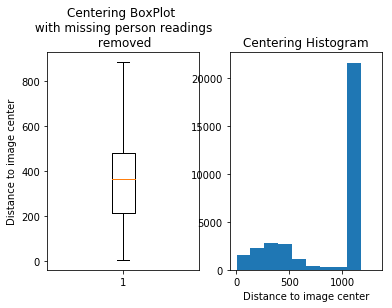

In [116]:
fig1, (ax1,ax2) = plt.subplots(1,2)
ax1.set_title('Centering BoxPlot \n with missing person readings \n removed')
ax1.set_ylabel('Distance to image center')
ax1.boxplot(centering_data[centering_data<1100], showfliers=False)

ax2.set_title('Centering Histogram')
ax2.set_xlabel('Distance to image center')
ax2.hist(centering_data)

plt.show()

## Box Plot and Histogram of Norm of Joint Errors

The actor was outside the frame approximately 49 % of the time


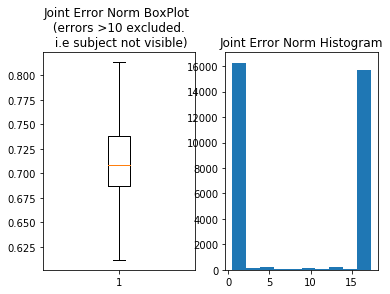

In [117]:
fig1, (ax1,ax2) = plt.subplots(1,2)
ax1.set_title('Joint Error Norm BoxPlot \n (errors >10 excluded. \n i.e subject not visible)')
out = ax1.boxplot(mean_data[:], showfliers=False)

ax2.set_title('Joint Error Norm Histogram')
out = ax2.hist(mean_data)


print(BOLD+'The actor was outside the frame approximately {} % of the time'.format(100*len(norm_joints_data[norm_joints_data>10])/len(norm_joints_data)))

## Write the numpy arrays to csv

In [118]:
folder='csvs/'
np.savetxt(folder+"sa_aircap_centering.csv", centering_data, delimiter=",")
np.savetxt(folder+"sa_aircap_mocap.csv", data, delimiter=",")
np.savetxt(folder+"sa_aircap_mocap_norms.csv", mean_data, delimiter=",")